# Introduction

# Data Import

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load mortality data
Cirrhosis_MOR0 = pd.read_csv('/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Cirrhosis/data/cir_mortality.csv')
Cirrhosis_MOR0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86432 entries, 0 to 86431
Data columns (total 64 columns):
VISIT_ID2                          86432 non-null int64
MORTALITY                          86432 non-null int64
AKI_CATEGORY2                      86432 non-null object
ARDS                               86432 non-null object
ABX                                86432 non-null int64
BETA_BLOCKER                       86432 non-null int64
CRYST_RES_VOL_CATEGORY             86432 non-null object
DIURETIC                           86432 non-null int64
GIDX_BLEEDING                      86432 non-null int64
GLYCEMIA                           86432 non-null object
HE                                 86432 non-null int64
HRS                                86432 non-null int64
LVP                                86432 non-null int64
RRT                                86432 non-null int64
SBP                                86432 non-null int64
SEPSIS                             86432 non-nu

In [3]:
# load LOS data
Cirrhosis_LOS0 = pd.read_csv('/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Cirrhosis/data/cir_hospital_los.csv')
Cirrhosis_LOS0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77176 entries, 0 to 77175
Data columns (total 4 columns):
VISIT_ID2                   77176 non-null int64
LOS_VISIT_PER_YEAR_GROUP    77176 non-null object
LOS_DAYS                    77176 non-null float64
LONG_LOS_DAYS               77176 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.4+ MB


In [4]:
# join dataframes on VISIT_ID2
Cirrhosis_LOS1 = pd.merge(Cirrhosis_MOR0, Cirrhosis_LOS0, on = 'VISIT_ID2')
Cirrhosis_LOS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77176 entries, 0 to 77175
Data columns (total 67 columns):
VISIT_ID2                          77176 non-null int64
MORTALITY                          77176 non-null int64
AKI_CATEGORY2                      77176 non-null object
ARDS                               77176 non-null object
ABX                                77176 non-null int64
BETA_BLOCKER                       77176 non-null int64
CRYST_RES_VOL_CATEGORY             77176 non-null object
DIURETIC                           77176 non-null int64
GIDX_BLEEDING                      77176 non-null int64
GLYCEMIA                           77176 non-null object
HE                                 77176 non-null int64
HRS                                77176 non-null int64
LVP                                77176 non-null int64
RRT                                77176 non-null int64
SBP                                77176 non-null int64
SEPSIS                             77176 non-nu

In [5]:
# drop variables
Cirrhosis_LOS2 = Cirrhosis_LOS1.drop(['MORTALITY', 'VISIT_PER_YEAR_GROUP', 'LOS_DAYS'], axis = 1)
Cirrhosis_LOS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77176 entries, 0 to 77175
Data columns (total 64 columns):
VISIT_ID2                          77176 non-null int64
AKI_CATEGORY2                      77176 non-null object
ARDS                               77176 non-null object
ABX                                77176 non-null int64
BETA_BLOCKER                       77176 non-null int64
CRYST_RES_VOL_CATEGORY             77176 non-null object
DIURETIC                           77176 non-null int64
GIDX_BLEEDING                      77176 non-null int64
GLYCEMIA                           77176 non-null object
HE                                 77176 non-null int64
HRS                                77176 non-null int64
LVP                                77176 non-null int64
RRT                                77176 non-null int64
SBP                                77176 non-null int64
SEPSIS                             77176 non-null int64
STEROIDS                           77176 non-nu

In [7]:
# set index
Cirrhosis_MOR0.set_index(['VISIT_ID2'], inplace = True)
Cirrhosis_LOS2.set_index(['VISIT_ID2'], inplace = True)

# Data Cleaning

## Delete Missing Values

In [10]:
# check missing values
missing_data = Cirrhosis_LOS2.isnull().sum(axis = 0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['missing %'] = missing_data['missing values'] / Cirrhosis_LOS2.shape[0] * 100
missing_data.sort_values('missing %').reset_index(drop = True)

,variable,missing values,missing %
0,AKI_CATEGORY2,0,0.000000
1,HEPATITIS,0,0.000000
2,ALCOHOLIC_CIRRHOSIS,0,0.000000
3,LOS_VISIT_PER_YEAR_GROUP,0,0.000000
4,URBAN,0,0.000000
5,TEACHING_FACILITY,0,0.000000
6,RACE_GROUP,0,0.000000
7,PAYER_GROUP,0,0.000000
8,INDEX_YEAR,0,0.000000
9,FEMALE,0,0.000000


In [19]:
# delete missing values
Cirrhosis_LOS3 = Cirrhosis_LOS2.dropna()
Cirrhosis_LOS3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74275 entries, 326305398 to 283396498
Data columns (total 63 columns):
AKI_CATEGORY2                      74275 non-null object
ARDS                               74275 non-null object
ABX                                74275 non-null int64
BETA_BLOCKER                       74275 non-null int64
CRYST_RES_VOL_CATEGORY             74275 non-null object
DIURETIC                           74275 non-null int64
GIDX_BLEEDING                      74275 non-null int64
GLYCEMIA                           74275 non-null object
HE                                 74275 non-null int64
HRS                                74275 non-null int64
LVP                                74275 non-null int64
RRT                                74275 non-null int64
SBP                                74275 non-null int64
SEPSIS                             74275 non-null int64
STEROIDS                           74275 non-null int64
TIME_TO_ALB_CATEGORY_LOS           

## Encode Categorical Features

In [12]:
# encode categorical features
Cirrhosis_LOS4 = pd.get_dummies(Cirrhosis_LOS3)
Cirrhosis_LOS4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74275 entries, 326305398 to 283396498
Columns: 105 entries, ABX to LOS_VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_G5
dtypes: float64(31), int64(19), uint8(55)
memory usage: 32.8 MB


In [15]:
# drop one level to avoid collinearity
variables_to_drop = ['AKI_CATEGORY2_NONE', 'ARDS_NONE', 'CRYST_RES_VOL_CATEGORY_>1250', 
                     'GLYCEMIA_NEITHER', 'TIME_TO_ALB_CATEGORY_LOS_NONE', 'ADMISSION_TYPE_GROUP_Emergency', 
                     'AGE_GROUP_18-29', 'BED_SIZE_0-99', 'CENSUS_REGION_South', 
                     'PAYER_GROUP_Commercial', 'RACE_GROUP_Caucasian', 'TEACHING_FACILITY_No', 
                     'LOS_VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_G5']
Cirrhosis_LOS5 = Cirrhosis_LOS4.drop(variables_to_drop, axis = 1)
Cirrhosis_LOS5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74275 entries, 326305398 to 283396498
Data columns (total 92 columns):
ABX                                           74275 non-null int64
BETA_BLOCKER                                  74275 non-null int64
DIURETIC                                      74275 non-null int64
GIDX_BLEEDING                                 74275 non-null int64
HE                                            74275 non-null int64
HRS                                           74275 non-null int64
LVP                                           74275 non-null int64
RRT                                           74275 non-null int64
SBP                                           74275 non-null int64
SEPSIS                                        74275 non-null int64
STEROIDS                                      74275 non-null int64
VENTILATION                                   74275 non-null int64
VASOPRESSOR                                   74275 non-null int64
FEMALE  

In [16]:
# check table
Cirrhosis_LOS5.head()

,ABX,BETA_BLOCKER,DIURETIC,GIDX_BLEEDING,HE,HRS,LVP,RRT,SBP,SEPSIS,...,RACE_GROUP_Asian/Pacific Islander,RACE_GROUP_Hispanic,RACE_GROUP_Not Specified,RACE_GROUP_Other,TEACHING_FACILITY_Not Specified,TEACHING_FACILITY_Yes,LOS_VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_G1,LOS_VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_G2,LOS_VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_G3,LOS_VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_G4
VISIT_ID2,,,,,,,,,,,,,,,,,,,,,
326305398,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
326305419,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
340607531,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
340607536,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
198608445,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0


# Data Preparation

## Seperate Features and Targets

In [18]:
# create the target vector
y = Cirrhosis_LOS5.iloc[:, Cirrhosis_LOS5.columns == 'LONG_LOS_DAYS']
y['LONG_LOS_DAYS'].value_counts()

0    55984
1    18291
Name: LONG_LOS_DAYS, dtype: int64

In [20]:
y['LONG_LOS_DAYS'].value_counts(normalize = True)

0    0.753739
1    0.246261
Name: LONG_LOS_DAYS, dtype: float64

In [22]:
# create the features matrix
X = Cirrhosis_LOS5.iloc[:, Cirrhosis_LOS5.columns != 'LONG_LOS_DAYS']
X.describe()

,ABX,BETA_BLOCKER,DIURETIC,GIDX_BLEEDING,HE,HRS,LVP,RRT,SBP,SEPSIS,...,RACE_GROUP_Asian/Pacific Islander,RACE_GROUP_Hispanic,RACE_GROUP_Not Specified,RACE_GROUP_Other,TEACHING_FACILITY_Not Specified,TEACHING_FACILITY_Yes,LOS_VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_G1,LOS_VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_G2,LOS_VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_G3,LOS_VISIT_PER_YEAR_GROUP_VISIT_PER_YEAR_G4
count,74275.000000,74275.000000,74275.000000,74275.000000,74275.000000,74275.000000,74275.000000,74275.000000,74275.000000,74275.000000,...,74275.000000,74275.000000,74275.000000,74275.000000,74275.000000,74275.000000,74275.000000,74275.000000,74275.000000,74275.000000
mean,0.598492,0.171188,0.431316,0.137166,0.180061,0.034574,0.257556,0.045924,0.032151,0.071262,...,0.013948,0.013706,0.013814,0.072191,0.174446,0.669054,0.202895,0.220734,0.177543,0.217839
std,0.490207,0.376676,0.495263,0.344025,0.384240,0.182700,0.437291,0.209322,0.176402,0.257264,...,0.117277,0.116268,0.116717,0.258806,0.379495,0.470557,0.402157,0.414744,0.382130,0.412780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split Data into Training and Test Sets

In [23]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345)
print('Training Features Shape:', X_train.shape)
print('Training Lable Shape:', y_train.shape)
print('Test Features Shape:', X_test.shape)
print('Test Lable Shape:', y_test.shape)

Training Features Shape: (51992, 91)
Training Lable Shape: (51992, 1)
Test Features Shape: (22283, 91)
Test Lable Shape: (22283, 1)


In [24]:
# fit standardizer to training set
standardizer = StandardScaler()
standardizer.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
# apply to both training and test sets
X_trian_std = standardizer.transform(X_train)
X_test_std = standardizer.transform(X_test)

In [26]:
# covert labels to arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Logistic Regression

## Train Model

In [27]:
# create a base Logistic model
base_logit = LogisticRegression(class_weight = 'balanced', random_state = 12345)

In [28]:
# train the model on training data
base_logit.fit(X_trian_std , y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2',
          random_state=12345, solver='warn', tol=0.0001, verbose=0,
          warm_start=False)

## Predict Test Data

In [29]:
# predict test data
y_pred_logit = base_logit.predict(X_test_std)
y_pred_prob_logit = base_logit.predict_proba(X_test_std)

## Evaulate Performance

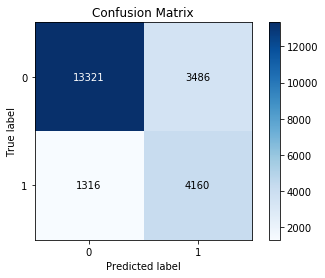

In [31]:
# plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_logit)
plt.show()

In [32]:
# extract true_positives, false_positives, true_negatives, false_negatives
cm_matrix = confusion_matrix(y_test, y_pred_logit)
tn, fp, fn, tp = cm_matrix.ravel()
print('True Negatives: ', tn)
print('False Positives: ', fp)
print('False Negatives: ', fn)
print('True Positives: ', tp)

True Negatives:  13321
False Positives:  3486
False Negatives:  1316
True Positives:  4160


In [33]:
# accuracy
accuracy = (tn+tp)/(tp+tn+fp+fn)
print("Accuracy {:0.2f}:".format(accuracy))

Accuracy 0.78:


In [34]:
# precision
precision = tp/(tp+fp)
print("Precision {:0.2f}:".format(precision))

Precision 0.54:


In [35]:
# recall
recall = tp /(tp+fn)
print("# Recall {:0.2f}:".format(recall))

# Recall 0.76:


In [36]:
# f1 score
f1 = (2*precision*recall)/(precision+recall)
print("# F1 Score {:0.2f}:".format(f1))

# F1 Score 0.63:


In [37]:
# print classification report
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85     16807
           1       0.54      0.76      0.63      5476

   micro avg       0.78      0.78      0.78     22283
   macro avg       0.73      0.78      0.74     22283
weighted avg       0.82      0.78      0.79     22283



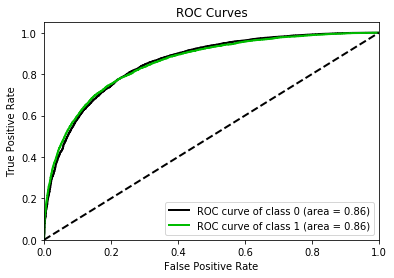

In [38]:
# plot ROC curves
skplt.metrics.plot_roc_curve(y_test, y_pred_prob_logit, curves = ('each_class'))
plt.show()

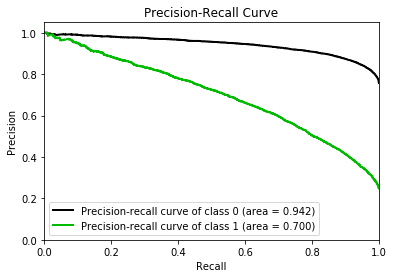

In [39]:
# plot Precision-Recall curve
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_prob_logit, curves = ('each_class'))
plt.show()

# Random Forests

## Train Model

In [40]:
# create a base Random Forest model
base_rf = RandomForestClassifier(n_estimators = 1000, class_weight = 'balanced', random_state = 12345)

In [41]:
# train the model on training data
base_rf.fit(X_trian_std , y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=None, oob_score=False,
            random_state=12345, verbose=0, warm_start=False)

## Predict Test Data

In [42]:
# predict test data
y_pred_rf = base_rf.predict(X_test_std)
y_pred_prob_rf = base_rf.predict_proba(X_test_std)

## Evaulate Performance

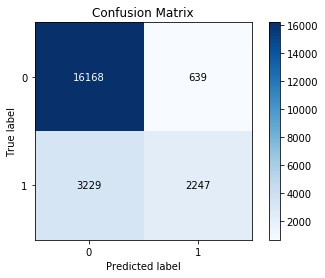

In [43]:
# plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf)
plt.show()

In [44]:
# extract true_positives, false_positives, true_negatives, false_negatives
cm_matrix = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_matrix.ravel()
print('True Negatives: ', tn)
print('False Positives: ', fp)
print('False Negatives: ', fn)
print('True Positives: ', tp)

True Negatives:  16168
False Positives:  639
False Negatives:  3229
True Positives:  2247


In [45]:
# accuracy
accuracy = (tn+tp)/(tp+tn+fp+fn)
print("Accuracy {:0.2f}:".format(accuracy))

Accuracy 0.83:


In [46]:
# precision
precision = tp/(tp+fp)
print("Precision {:0.2f}:".format(precision))

Precision 0.78:


In [47]:
# recall
recall = tp /(tp+fn)
print("# Recall {:0.2f}:".format(recall))

# Recall 0.41:


In [48]:
# f1 score
f1 = (2*precision*recall)/(precision+recall)
print("# F1 Score {:0.2f}:".format(f1))

# F1 Score 0.54:


In [49]:
# print classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     16807
           1       0.78      0.41      0.54      5476

   micro avg       0.83      0.83      0.83     22283
   macro avg       0.81      0.69      0.72     22283
weighted avg       0.82      0.83      0.81     22283



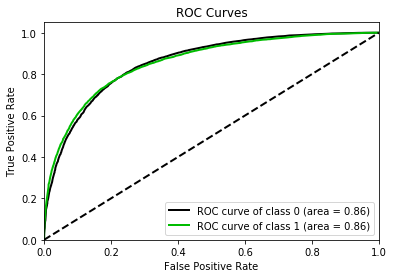

In [50]:
# plot ROC curves
skplt.metrics.plot_roc_curve(y_test, y_pred_prob_rf, curves = ('each_class'))
plt.show()

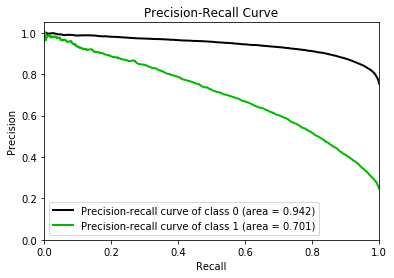

In [51]:
# plot Precision-Recall curve
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_prob_rf, curves = ('each_class'))
plt.show()

## Examine Variable Importances

In [52]:
# create a dataframe of feature importances
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns
feature_importances['importance'] = base_rf.feature_importances_
feature_importances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
feature       91 non-null object
importance    91 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [53]:
# sort dataframe by feature importances
feature_importances_srt = feature_importances.sort_values(by='importance', ascending = False).reset_index()
feature_importances_srt

,index,feature,importance
0,17,MELD_Na,0.052334
1,16,ELIXHAUSER_INDEX,0.051201
2,12,VASOPRESSOR,0.042076
3,54,"CRYST_RES_VOL_CATEGORY_(0, 500]",0.040253
4,0,ABX,0.037071
5,14,INDEX_YEAR,0.034748
6,49,AKI_CATEGORY2_MILD,0.034688
7,61,TIME_TO_ALB_CATEGORY_LOS_>24,0.032542
8,11,VENTILATION,0.025621
9,2,DIURETIC,0.019877


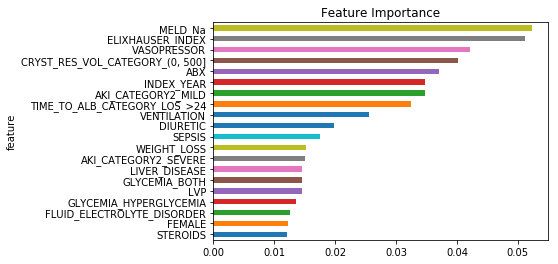

In [54]:
# plot Top 20 feature importances
feature_importances_top20 = feature_importances_srt.iloc[0:20, :]
feature_importances_top20.sort_values(by='importance', ascending = True, inplace = True)
feature_importances_top20.plot(x = 'feature', y = 'importance', kind = 'barh', legend = False)
plt.title('Feature Importance')
plt.show()

# Conclusion